In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import xgboost as xgb
import pandas as pd
import numpy as np
import gzip
import math
import pickle
import zlib
import io
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from matplotlib import pyplot as pt
import tensorboard
import tensorflow
from torch.utils.data import DataLoader, Dataset
import torchvision
from collections import defaultdict
from tqdm import tqdm, tqdm_notebook, tnrange

In [0]:
mkdir /root/.kaggle

In [0]:
cd /root/.kaggle

/root/.kaggle


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samuelpreethaml","key":"14617aaa25068d81fb4b1232097ec0ec"}'}

In [0]:
mkdir /root/recommender

In [0]:
cd /root/recommender

/root/recommender


In [0]:
!kaggle competitions download -c santander-product-recommendation

  0% 0.00/2.28M [00:00<?, ?B/s]
100% 2.28M/2.28M [00:00<00:00, 76.0MB/s]
 40% 5.00M/12.4M [00:00<00:00, 51.3MB/s]
100% 12.4M/12.4M [00:00<00:00, 79.1MB/s]
 94% 201M/214M [00:01<00:00, 105MB/s]
100% 214M/214M [00:01<00:00, 114MB/s]


In [0]:
!unzip train_ver2.csv.zip
!unzip test_ver2.csv.zip

Archive:  train_ver2.csv.zip
  inflating: train_ver2.csv          
Archive:  test_ver2.csv.zip
  inflating: test_ver2.csv           


In [0]:
f=pd.read_csv('train_ver2.csv','r',encoding='utf=8',delimiter=',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
headers=['Partitioned Date','Customer code','Employee index','Country residence','sex','Age','Date of First holder','New customer Index','Customer seniority','Primary Customer','Last date as primary customer','type at beginning','relation at beginning','Residence index','Foreigner index','Spouse index','channel to join','Deceased index','Addres type','Province code','Province name','Activity index','Gross income','segmentation','Saving Account','Guarantees','Current Accounts','Derivada Account','Payroll Account','Junior Account','Más particular Account','particular Account','particular Plus Account','Short-term deposits','Medium-term deposits','Long-term deposits','e-account','Funds','Mortgage','Pensions','Loans','Taxes','Credit Card','Securities','Home Account','Payroll','Pensions2','Direct Debit']

In [0]:
f.columns=headers

In [0]:
data=f[(13647309-931453-928274-925076):13647309]

In [0]:
data.to_csv('data.csv')

In [0]:
data=pd.read_csv('data.csv','r',encoding='utf=8',delimiter=',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
del(data['Unnamed: 0'])

In [0]:
data=f

In [0]:
del(data['Employee index'])
del(data['Country residence'])
del(data['Date of First holder'])
del(data['Primary Customer'])
del(data['Last date as primary customer'])
del(data['type at beginning'])
del(data['Residence index'])
del(data['Spouse index'])
del(data['Deceased index'])
del(data['Addres type'])
del(data['Province name'])
data

,Partitioned Date,Customer code,sex,Age,New customer Index,Customer seniority,relation at beginning,Foreigner index,channel to join,Province code,Activity index,Gross income,segmentation,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
0,2015-01-28,1375586,H,35,0.0,6,A,N,KHL,29.0,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,V,23,0.0,35,I,S,KHE,13.0,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,V,23,0.0,35,I,N,KHE,13.0,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,H,22,0.0,35,I,N,KHD,50.0,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,V,23,0.0,35,A,N,KHE,50.0,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,H,23,0.0,35,I,N,KHE,45.0,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,H,23,0.0,35,I,N,KHE,24.0,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,H,23,0.0,35,A,N,KHE,50.0,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,H,24,0.0,35,I,N,KHE,20.0,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,H,23,0.0,35,I,N,KHE,10.0,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
dic={}
for m in list(f.columns[24:48]):
  i=0
  sums=[]
  for j in sorted(f['Partitioned Date'].value_counts()):
    k=i+j
    g=f[i:k]
    columns=[]
    sums.append(sum(g[m]))
    n=[]
    for i in range(len(sums)-1):
      n.append(sums[i+1]-sums[i])
    dic[m]=n
    i=k
data=pd.DataFrame(dic,index=list(f['Partitioned Date'].unique())[1:])
data

In [0]:
def custom_one_hot(df, features, name, names, dtype=np.int8, check=False):
    for n, val in names.items():
        new_name = "%s_%s" % (name, n)
        print(name, new_name)
        df[new_name] = df[name].map(lambda x: 1 if x == val else 0).astype(dtype)

        if check:
            assert_uniq(df[new_name], new_name)
        features.append(new_name)

In [0]:
def label_encode(df, features, name):
    df[name] = df[name].astype('str')
    if name in transformers: # test
        df[name] = transformers[name].transform(df[name])
    else: # train
        transformers[name] = sklearn.preprocessing.LabelEncoder()
        df[name] = transformers[name].fit_transform(df[name])
    features.append(name)

In [0]:
def encode_top(s, count=100, dtype=np.int8):
    uniqs, freqs = np.unique(s, return_counts=True)
    top = sorted(zip(uniqs,freqs), key=lambda vk: vk[1], reverse = True)[:count]
    top_map = {uf[0]: l+1 for uf, l in zip(top, range(len(top)))}
    return s.map(lambda x: top_map.get(x, 0)).astype(dtype) ### LEARNT use of .map(lambda x: x)

In [0]:
def date_to_float(str_date):
    if str_date.__class__ is float and math.isnan(str_date) or str_date == "":
        return np.nan
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    float_date = float(Y) * 12 + float(M)
    return float_date
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")] # "2016-05-28"
    int_date = (int(Y) - 2015) * 12 + int(M)
    assert 1 <= int_date <= 12 + 6
    return int_date


In [0]:
def assert_uniq(series, name):
    uniq = np.unique(series, return_counts=True)
    print("assert_uniq", name, uniq)

In [0]:
features=[]
transformers={}
label_encode(data, features, "channel to join") # simple label encode
# label_encode(data, features, "nomprov") # use cod_prov only
label_encode(data, features, "Country residence") # simple label encode

data['Age']=data['Age'].replace(' NA',data['type at beginning'].value_counts().index[0])
data["Age"] = data["Age"].fillna(0.0).astype(np.int16) # simple int conversion
features.append("ge")

data["Gross income"].fillna(1.0, inplace=True)
data["Gross income"] = data["Gross income"].map(math.log) # log transform renta ### LEARNT direct transform
features.append("Gross income")

# LEARNT how to use if/else in .map(lambda x: x)
data["Customer seniority"]=data["Customer seniority"].replace('-999999',0)
data["Customer seniority"]=data["Customer seniority"].replace('     NA',0)
data["Customer seniority"] = data["Customer seniority"].map(lambda x: 0.0 if int(x)< 0 or math.isnan(int(x)) else int(x)+1.0).astype(np.int16)
features.append("Customer seniority")

data["Addres type"] = data["Addres type"].fillna(0.0).astype(np.int8)
features.append("Addres type")

data["Province code"] = data["Province code"].fillna(0.0).astype(np.int8)
features.append("Province code")

data["Partitioned month"] = data["Partitioned Date"].map(lambda x: int(x.split("-")[1])).astype(np.int8)
features.append("Partitioned month")
data["Partitioned year"] = data["Partitioned Date"].map(lambda x: float(x.split("-")[0])).astype(np.int16)
features.append("Partitioned year")
# LEARNT use of x.__class__ for nan in fecha_alta
data["Month of First holder"] = data["Date of First holder"].map(lambda x: 0.0 if x.__class__ is float else float(x.split("-")[1])).astype(np.int8)
features.append("Month of First holder")
data["Year of First holder"] = data["Date of First holder"].map(lambda x: 0.0 if x.__class__ is float else float(x.split("-")[0])).astype(np.int16)
features.append("Year of First holder")

# change date column to Y*12 + M float column
data["Partitioned month float"] = data["Partitioned Date"].map(date_to_float)
data["Date of First holder float"] = data["Date of First holder"].map(date_to_float)

data["Date Minus"] = data["Partitioned month float"] - data["Date of First holder float"]
features.append("Date Minus")

data["Int Date"] = data["Partitioned Date"].map(date_to_int).astype(np.int8)

custom_one_hot(data, features, "Residence index", {"n":"N"})
custom_one_hot(data, features, "Foreigner index", {"s":"S"})
custom_one_hot(data, features, "Spouse index", {"n":"N"})
custom_one_hot(data, features, "sex", {"h":"H", "v":"V"})
custom_one_hot(data, features, "Employee index", {"a":"A", "b":"B", "f":"F", "n":"N"})
custom_one_hot(data, features, "New customer Index", {"new":1})
custom_one_hot(data, features, "segmentation", {"top":"01 - TOP", "particulares":"02 - PARTICULARES", "universitario":"03 - UNIVERSITARIO"})
custom_one_hot(data, features, "Deceased index", {"s":"S"})

data["Activity index"] = data["Activity index"].map(lambda x: 0.0 if math.isnan(x) else x+1.0).astype(np.int8)
features.append("Activity index")
custom_one_hot(data, features, "Primary Customer", {"1":1, "99":99})
data["type at beginning"] = data["type at beginning"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
features.append("type at beginning")
custom_one_hot(data, features, "relation at beginning", {"a":"A", "i":"I", "p":"P", "r":"R"}, check=True)

Residence index Residence index_n
Foreigner index Foreigner index_s
Spouse index Spouse index_n
sex sex_h
sex sex_v
Employee index Employee index_a
Employee index Employee index_b
Employee index Employee index_f
Employee index Employee index_n
New customer Index New customer Index_new
segmentation segmentation_top
segmentation segmentation_particulares
segmentation segmentation_universitario
Deceased index Deceased index_s
Primary Customer Primary Customer_1
Primary Customer Primary Customer_99
relation at beginning relation at beginning_a
assert_uniq relation at beginning_a (array([0, 1], dtype=int8), array([7460186, 6187123]))
relation at beginning relation at beginning_i
assert_uniq relation at beginning_i (array([0, 1], dtype=int8), array([6342434, 7304875]))
relation at beginning relation at beginning_p
assert_uniq relation at beginning_p (array([0, 1], dtype=int8), array([13642653,     4656]))
relation at beginning relation at beginning_r
assert_uniq relation at beginning_r (arra

In [0]:
data["Customer seniority"].unique()

array([  7,  36,  35,   1,  34,  32,  22,  17,  28,  10,  23,  14,  30,
         9,  12,  11,  29,  25,   8,  26,  15,  27,  13,  24,   2,  19,
         5,   4,  18,  33,  31,  21,  16,  20, 158,  37,   6,  41,  39,
        38,  40,   3,  48,  45,  43,  47,  46,  44,  42,  58,  49,  53,
        50,  51,  57,  59,  52,  56,  55,  54,  60,  63,  62,  61,  64,
       140, 166, 119, 165, 143,  95, 160, 144, 106, 152, 163, 138, 151,
       129, 123, 157, 120, 161,  80,  96, 133, 162,  99, 128,  73, 156,
       109, 164, 103, 149, 116, 147, 108,  82, 217, 136,  93, 122, 199,
       135,  94, 141, 111, 121, 148, 117,  65,  78,  86, 100,  79, 101,
       114, 155, 167, 134, 125, 142,  67, 118,  87, 194,  81, 145,  88,
       127, 159, 102, 236,  89, 146, 104, 150, 110, 132,  98,  69,  85,
       233, 126, 178, 113,  97,  70, 172, 168, 105,  77,  83, 153,  71,
       139, 170,  66, 130, 191, 115, 112, 177, 154,  90, 137,  84, 124,
       188, 107, 232, 190, 218, 173, 200, 174, 175, 210, 181, 17

In [0]:
del(data['Foreigner index'])
del(data['Spouse index'])
del(data['sex'])
del(data['Employee index'])
del(data['Residence index'])
del(data['New customer Index'])
del(data['segmentation'])
del(data['Deceased index'])
del(data['Primary Customer'])
del(data['relation at beginning'])
del(data['Province name'])
del(data['Last date as primary customer'])
del(data['Date of First holder'])
del(data['Partitioned Date'])

In [0]:
first=pd.concat([data.iloc[:,1:10],data.iloc[:,34:63],data.iloc[:,10:34]],axis=1, sort=False)
del(first['Partitioned month float'])
del(first['Date of First holder float'])
del(first['Partitioned month'])
del(first['Partitioned year'])
del(first['Month of First holder'])	
del(first['Year of First holder'])
del(first['Date Minus'])
del(first['Int Date'])
first

,Country residence,Age,Customer seniority,type at beginning,channel to join,Addres type,Province code,Activity index,Gross income,Residence index_n,Foreigner index_s,Spouse index_n,sex_h,sex_v,Employee index_a,Employee index_b,Employee index_f,Employee index_n,New customer Index_new,segmentation_top,segmentation_particulares,segmentation_universitario,Deceased index_s,Primary Customer_1,Primary Customer_99,relation at beginning_a,relation at beginning_i,relation at beginning_p,relation at beginning_r,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
0,36,35,7,1,153,1,29,2,11.376167,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,36,23,36,1,150,1,13,1,10.478660,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,36,23,36,1,150,1,13,1,11.713243,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,36,22,36,1,149,1,50,1,11.693375,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,36,23,36,1,150,1,50,2,0.000000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5,36,23,36,1,150,1,45,1,10.008750,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6,36,23,36,1,150,1,24,1,12.596730,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
7,36,23,36,1,150,1,50,2,11.637941,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
8,36,24,36,1,150,1,20,1,0.000000,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
9,36,23,36,1,150,1,10,1,11.636867,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
train=first[:13647309-931453]
test=first[13647309-931453:]
train.reset_index(inplace=True)
test.reset_index(inplace=True)
del[train['index']]
del[test['index']]
train

,Country residence,Age,Customer seniority,type at beginning,channel to join,Addres type,Province code,Activity index,Gross income,Residence index_n,Foreigner index_s,Spouse index_n,sex_h,sex_v,Employee index_a,Employee index_b,Employee index_f,Employee index_n,New customer Index_new,segmentation_top,segmentation_particulares,segmentation_universitario,Deceased index_s,Primary Customer_1,Primary Customer_99,relation at beginning_a,relation at beginning_i,relation at beginning_p,relation at beginning_r,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
0,36,35,7,1,153,1,29,2,11.376167,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,36,23,36,1,150,1,13,1,10.478660,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,36,23,36,1,150,1,13,1,11.713243,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,36,22,36,1,149,1,50,1,11.693375,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,36,23,36,1,150,1,50,2,0.000000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5,36,23,36,1,150,1,45,1,10.008750,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6,36,23,36,1,150,1,24,1,12.596730,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
7,36,23,36,1,150,1,50,2,11.637941,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
8,36,24,36,1,150,1,20,1,0.000000,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
9,36,23,36,1,150,1,10,1,11.636867,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
train.columns
catf=['Country residence','type at beginning','channel to join','Addres type','Province code','Activity index','Residence index_n', 'Foreigner index_s', 'Spouse index_n',
       'sex_h', 'sex_v', 'Employee index_a', 'Employee index_b',
       'Employee index_f', 'Employee index_n', 'New customer Index_new',
       'segmentation_top', 'segmentation_particulares',
       'segmentation_universitario', 'Deceased index_s', 'Primary Customer_1',
       'Primary Customer_99', 'relation at beginning_a',
       'relation at beginning_i', 'relation at beginning_p',
       'relation at beginning_r']
features=list(train.columns[35:])
trainx=train.iloc[:,0:29]
trainy=train.iloc[:,29:]

In [0]:
conf=[col for col in trainx.columns if col not in catf]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(trainx, trainy,test_size=0.25, random_state=42)
X_train

,Country residence,Age,Customer seniority,type at beginning,channel to join,Addres type,Province code,Activity index,Gross income,Residence index_n,Foreigner index_s,Spouse index_n,sex_h,sex_v,Employee index_a,Employee index_b,Employee index_f,Employee index_n,New customer Index_new,segmentation_top,segmentation_particulares,segmentation_universitario,Deceased index_s,Primary Customer_1,Primary Customer_99,relation at beginning_a,relation at beginning_i,relation at beginning_p,relation at beginning_r
271890,36,24,24,1,150,1,47,2,10.839277,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
12549294,36,21,8,1,158,1,28,1,0.000000,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
8500977,36,89,174,1,28,1,8,1,12.734530,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7924479,36,24,49,1,150,1,45,1,10.943075,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
8292009,36,24,52,1,149,1,15,2,11.129763,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
283697,36,52,18,1,24,1,28,2,11.586532,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
10971820,36,35,6,1,155,1,50,2,0.000000,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0
12134011,36,47,189,1,24,1,41,2,10.465537,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
11168928,36,67,245,1,24,1,36,1,0.000000,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7093478,36,35,63,1,122,1,8,1,12.460816,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [0]:
del(f)
del(data)
del(first)
del(train)
del(trainx)

In [0]:
scaler=sklearn.preprocessing.StandardScaler().fit(X_train[conf])
sc= scaler.transform(X_train[conf])
scaled=pd.DataFrame(sc,columns=conf,index=X_train.index)
X_train_sc=pd.concat([scaled, X_train.drop(conf, axis=1)], axis=1)
X_train_sc.std(axis=0)

Age                            1.000000
Customer seniority             1.000000
Gross income                   1.000000
Country residence              4.679270
type at beginning              0.118017
channel to join               55.350076
Addres type                    0.046607
Province code                 12.927756
Activity index                 0.502505
Residence index_n              0.069441
Foreigner index_s              0.211686
Spouse index_n                 0.011462
sex_h                          0.497852
sex_v                          0.498050
Employee index_a               0.013733
Employee index_b               0.016308
Employee index_f               0.013760
Employee index_n               0.053049
New customer Index_new         0.239485
segmentation_top               0.199240
segmentation_particulares      0.493013
segmentation_universitario     0.480284
Deceased index_s               0.050378
Primary Customer_1             0.062958
Primary Customer_99            0.042421


In [0]:
scaler=sklearn.preprocessing.StandardScaler().fit(X_test[conf])
sc= scaler.transform(X_test[conf])
scaled=pd.DataFrame(sc,columns=conf,index=X_test.index)
X_test_sc=pd.concat([scaled, X_test.drop(conf, axis=1)], axis=1)
X_test_sc.std(axis=0)

Age                            1.000000
Customer seniority             1.000000
Gross income                   1.000000
Country residence              4.713113
type at beginning              0.117938
channel to join               55.354164
Addres type                    0.046787
Province code                 12.926950
Activity index                 0.502529
Residence index_n              0.070016
Foreigner index_s              0.212070
Spouse index_n                 0.011562
sex_h                          0.497856
sex_v                          0.498056
Employee index_a               0.013092
Employee index_b               0.015960
Employee index_f               0.013330
Employee index_n               0.052829
New customer Index_new         0.239546
segmentation_top               0.199345
segmentation_particulares      0.492985
segmentation_universitario     0.480195
Deceased index_s               0.050506
Primary Customer_1             0.063090
Primary Customer_99            0.042417


In [0]:
class RegressionColumnarDataset(Dataset):
    def __init__(self, df, cats,dy):
        self.dfcats = df[cats]
        self.dfconts = df.drop(cats, axis=1)
        self.dy=dy

        
        self.cats = np.stack([c.values for n, c in self.dfcats.items()], axis=1).astype(np.int64)
        self.conts = np.stack([c.values for n, c in self.dfconts.items()], axis=1).astype(np.float32)
        self.y = np.stack([c.values for n, c in self.dy.items()], axis=1).astype(np.float32)
        
    def __len__(self): return len(self.y)

    def __getitem__(self, idx):
        return [self.cats[idx], self.conts[idx], self.y[idx]]

In [0]:
traind=RegressionColumnarDataset(X_train_sc,catf,y_train)
valds = RegressionColumnarDataset(X_test_sc, catf, y_test)

In [0]:
params = {'batch_size': 128,
          'shuffle': True,
          'num_workers': 8}

traindl = DataLoader(traind, **params)
valdl = DataLoader(valds, **params)

In [0]:
y_range = (0, sum(y_train.max())/len(y_train.columns))
print(y_range)

cat_sz = [(c, X_train_sc[c].max()+1) for c in catf]
print(cat_sz)

emb_szs = [(int(c), min(50, (c+1)//2)) for _,c in cat_sz]
print(emb_szs)

(0, 1.0)
[('Country residence', 119), ('type at beginning', 6), ('channel to join', 163), ('Addres type', 2), ('Province code', 53), ('Activity index', 3), ('Residence index_n', 2), ('Foreigner index_s', 2), ('Spouse index_n', 2), ('sex_h', 2), ('sex_v', 2), ('Employee index_a', 2), ('Employee index_b', 2), ('Employee index_f', 2), ('Employee index_n', 2), ('New customer Index_new', 2), ('segmentation_top', 2), ('segmentation_particulares', 2), ('segmentation_universitario', 2), ('Deceased index_s', 2), ('Primary Customer_1', 2), ('Primary Customer_99', 2), ('relation at beginning_a', 2), ('relation at beginning_i', 2), ('relation at beginning_p', 2), ('relation at beginning_r', 2)]
[(119, 50), (6, 3), (163, 50), (2, 1), (53, 27), (3, 2), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1)]


In [0]:
class MixedInputModel(nn.Module):
    def __init__(self, emb_szs, n_cont, emb_drop, out_sz, szs, drops, y_range, use_bn=True):
        super().__init__()
        for i,(c,s) in enumerate(emb_szs): assert c > 1, f"cardinality must be >=2, got emb_szs[{i}]: ({c},{s})"
        self.embs = nn.ModuleList([nn.Embedding(c, s) for c,s in emb_szs])
        for emb in self.embs: emb_init(emb)
        n_emb = sum(e.embedding_dim for e in self.embs)
        self.n_emb, self.n_cont=n_emb, n_cont
        
        szs = [n_emb+n_cont] + szs
        self.lins = nn.ModuleList([nn.Linear(szs[i], szs[i+1]) for i in range(len(szs)-1)])
        self.bns = nn.ModuleList([nn.BatchNorm1d(sz) for sz in szs[1:]])
        for o in self.lins: nn.init.kaiming_normal_(o.weight.data)
        self.outp = nn.Linear(szs[-1], out_sz)
        nn.init.kaiming_normal_(self.outp.weight.data)

        self.emb_drop = nn.Dropout(emb_drop)
        self.drops = nn.ModuleList([nn.Dropout(drop) for drop in drops])
        self.bn = nn.BatchNorm1d(n_cont)
        self.use_bn,self.y_range = use_bn,y_range

    def forward(self, x_cat, x_cont):
        if self.n_emb != 0:
            x = [e(x_cat[:,i]) for i,e in enumerate(self.embs)]
            x = torch.cat(x, 1)
            x = self.emb_drop(x)
        if self.n_cont != 0:
            x2 = self.bn(x_cont)
            x = torch.cat([x, x2], 1) if self.n_emb != 0 else x2
        for l,d,b in zip(self.lins, self.drops, self.bns):
            x = F.relu(l(x))
            if self.use_bn: x = b(x)
            x = d(x)
        x = self.outp(x)
        if self.y_range:
            x = torch.sigmoid(x)
            x = x*(self.y_range[1] - self.y_range[0])
            x = x+self.y_range[0]
        return x.squeeze()

def fit(model, train_dl, val_dl, loss_fn, opt, scheduler, epochs=3):
    num_batch = len(train_dl)
    for epoch in tnrange(epochs):      
        y_true_train = list()
        y_pred_train = list()
        total_loss_train = 0          
        
        t = tqdm_notebook(iter(train_dl), leave=False, total=num_batch)
        for cat, cont, y in t:
            cat = cat.cuda()
            cont = cont.cuda()
            y = y.cuda()
            
            t.set_description(f'Epoch {epoch}')
            
            opt.zero_grad()
            pred = model(cat, cont)
            loss = loss_fn(pred, y)
            loss.backward()
            lr[epoch].append(opt.param_groups[0]['lr'])
            tloss[epoch].append(loss.item())
            scheduler.step()
            opt.step()
            
            t.set_postfix(loss=loss.item())
            
            y_true_train += list(y.cpu().data.numpy())
            y_pred_train += list(pred.cpu().data.numpy())
            total_loss_train += loss.item()
            
        train_acc = rmse(y_true_train, y_pred_train)
        train_loss = total_loss_train/len(train_dl)
        trcorrect=(y_true_train==np.around(y_pred_train,0)).sum()
        traccuracy=(trcorrect/(len(y_true_train)*24))*100

        
        if val_dl:
            y_true_val = list()
            y_pred_val = list()
            total_loss_val = 0
            ts_acc=[]
            for cat, cont, y in tqdm_notebook(val_dl, leave=False):
                cat = cat.cuda()
                cont = cont.cuda()
                y = y.cuda()
                pred = model(cat, cont)
                loss = loss_fn(pred, y)
                
                y_true_val += list(y.cpu().data.numpy())
                y_pred_val += list(pred.cpu().data.numpy())
                
                total_loss_val += loss.item()
                vloss[epoch].append(loss.item())
            valacc = rmse(y_true_val, y_pred_val)
            valloss = total_loss_val/len(valdl)
            
            tscorrect=(y_true_val==np.around(y_pred_val,0)).sum()
            tsaccuracy=(tscorrect/(len(y_true_val)*24))*100
            
            print(f'Epoch {epoch}: train_loss: {train_loss:.4f} train_rmse: {train_acc:.4f} | val_loss: {valloss:.4f} val_rmse: {valacc:.4f}')
            print(f'Training Accuracy {traccuracy:.4f}: Validating accuracy {tsaccuracy:.4f}')
        else:
            print(f'Epoch {epoch}: train_loss: {train_loss:.4f} train_rmse: {train_acc:.4f}')
    
    return lr, tloss, vloss

In [0]:
def emb_init(x):
    x = x.weight.data
    sc = 2/(x.size(1)+1)
    x.uniform_(-sc,sc)

In [0]:
m = MixedInputModel(emb_szs=emb_szs, 
                    n_cont=len(X_train_sc.columns)-len(catf), 
                    emb_drop=0.04, 
                    out_sz=24, 
                    szs=[1000,500,250], 
                    drops=[0.001,0.01,0.01], 
                    y_range=y_range).to(torch.device("cuda:0"))

opt = torch.optim.Adam(m.parameters(), 1e-2)
lr_cosine = torch.optim.lr_scheduler.CosineAnnealingLR(opt, 1000)

lr = defaultdict(list)
tloss = defaultdict(list)
vloss = defaultdict(list)

In [0]:
def rmse(targ, y_pred):
    return np.sqrt(sklearn.metrics.mean_squared_error(np.exp(y_pred), np.exp(targ)))

In [0]:
del(X_train)
m.train

<bound method Module.train of MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(119, 50)
    (1): Embedding(6, 3)
    (2): Embedding(163, 50)
    (3): Embedding(2, 1)
    (4): Embedding(53, 27)
    (5): Embedding(3, 2)
    (6): Embedding(2, 1)
    (7): Embedding(2, 1)
    (8): Embedding(2, 1)
    (9): Embedding(2, 1)
    (10): Embedding(2, 1)
    (11): Embedding(2, 1)
    (12): Embedding(2, 1)
    (13): Embedding(2, 1)
    (14): Embedding(2, 1)
    (15): Embedding(2, 1)
    (16): Embedding(2, 1)
    (17): Embedding(2, 1)
    (18): Embedding(2, 1)
    (19): Embedding(2, 1)
    (20): Embedding(2, 1)
    (21): Embedding(2, 1)
    (22): Embedding(2, 1)
    (23): Embedding(2, 1)
    (24): Embedding(2, 1)
    (25): Embedding(2, 1)
  )
  (lins): ModuleList(
    (0): Linear(in_features=156, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
    (2): Linear(in_features=500, out_features=250, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm

In [0]:
del(trainy)
del(X_test)
del(X_train_sc)
del(X_test_sc)

In [0]:
loss=nn.BCEWithLogitsLoss()

In [0]:
lr, tloss, vloss = fit(model=m, train_dl=traindl, val_dl=valdl, loss_fn=loss, opt=opt, scheduler=lr_cosine, epochs=10)

ValueError: ignored

In [0]:
for cat,cont,y in iter(traindl):
  print(y)

tensor([[0., 0., 1.,  ..., 0., 0., 1.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ...

KeyboardInterrupt: ignored

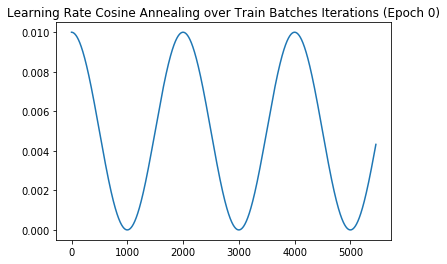

In [0]:
_ = pt.plot(lr[0])
_ = pt.title('Learning Rate Cosine Annealing over Train Batches Iterations (Epoch 0)')

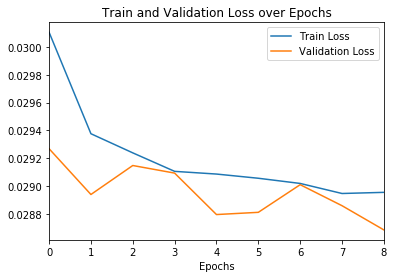

In [0]:
t = [np.mean(tloss[el]) for el in tloss]
v = [np.mean(vloss[el]) for el in vloss]
p = pd.DataFrame({'Train Loss': t, 'Validation Loss': v, 'Epochs': range(9)})

_ = p.plot(x='Epochs', y=['Train Loss', 'Validation Loss'], 
           title='Train and Validation Loss over Epochs')

In [0]:
data=pd.read_csv('test_ver2.csv','r',encoding='utf=8',delimiter=',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')

In [0]:
data.columns=headers[0:24]

In [0]:
features=[]
transformers={}
label_encode(data, features, "channel to join") # simple label encode
# label_encode(data, features, "nomprov") # use cod_prov only
label_encode(data, features, "Country residence") # simple label encode

data["Age"] = data["Age"].fillna(0.0).astype(np.int16) # simple int conversion
features.append("ge")

data["Gross income"].fillna(1.0, inplace=True)
data["Gross income"] = data["Gross income"].replace('         NA',1).astype(np.float).map(math.log) # log transform renta ### LEARNT direct transform
features.append("Gross income")

# LEARNT how to use if/else in .map(lambda x: x)
data["Customer seniority"] = data["Customer seniority"].map(lambda x: 0.0 if x < 0 or math.isnan(x) else x+1.0).astype(np.int16)
features.append("Customer seniority")

data["Addres type"] = data["Addres type"].fillna(0.0).astype(np.int8)
features.append("Addres type")

data["Province code"] = data["Province code"].fillna(0.0).astype(np.int8)
features.append("Province code")

data["Partitioned month"] = data["Partitioned Date"].map(lambda x: int(x.split("-")[1])).astype(np.int8)
features.append("Partitioned month")
data["Partitioned year"] = data["Partitioned Date"].map(lambda x: float(x.split("-")[0])).astype(np.int16)
features.append("Partitioned year")
# LEARNT use of x.__class__ for nan in fecha_alta
data["Month of First holder"] = data["Date of First holder"].map(lambda x: 0.0 if x.__class__ is float else float(x.split("-")[1])).astype(np.int8)
features.append("Month of First holder")
data["Year of First holder"] = data["Date of First holder"].map(lambda x: 0.0 if x.__class__ is float else float(x.split("-")[0])).astype(np.int16)
features.append("Year of First holder")

# change date column to Y*12 + M float column
data["Partitioned month float"] = data["Partitioned Date"].map(date_to_float)
data["Date of First holder float"] = data["Date of First holder"].map(date_to_float)

data["Date Minus"] = data["Partitioned month float"] - data["Date of First holder float"]
features.append("Date Minus")

data["Int Date"] = data["Partitioned Date"].map(date_to_int).astype(np.int8)

custom_one_hot(data, features, "Residence index", {"n":"N"})
custom_one_hot(data, features, "Foreigner index", {"s":"S"})
custom_one_hot(data, features, "Spouse index", {"n":"N"})
custom_one_hot(data, features, "sex", {"h":"H", "v":"V"})
custom_one_hot(data, features, "Employee index", {"a":"A", "b":"B", "f":"F", "n":"N"})
custom_one_hot(data, features, "New customer Index", {"new":1})
custom_one_hot(data, features, "segmentation", {"top":"01 - TOP", "particulares":"02 - PARTICULARES", "universitario":"03 - UNIVERSITARIO"})
custom_one_hot(data, features, "Deceased index", {"s":"S"})

data["Activity index"] = data["Activity index"].map(lambda x: 0.0 if math.isnan(x) else x+1.0).astype(np.int8)
features.append("Activity index")
custom_one_hot(data, features, "Primary Customer", {"1":1, "99":99})
data["type at beginning"] = data["type at beginning"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
features.append("type at beginning")
custom_one_hot(data, features, "relation at beginning", {"a":"A", "i":"I", "p":"P", "r":"R"}, check=True)

Residence index Residence index_n
Foreigner index Foreigner index_s
Spouse index Spouse index_n
sex sex_h
sex sex_v
Employee index Employee index_a
Employee index Employee index_b
Employee index Employee index_f
Employee index Employee index_n
New customer Index New customer Index_new
segmentation segmentation_top
segmentation segmentation_particulares
segmentation segmentation_universitario
Deceased index Deceased index_s
Primary Customer Primary Customer_1
Primary Customer Primary Customer_99
relation at beginning relation at beginning_a
assert_uniq relation at beginning_a (array([0, 1], dtype=int8), array([535993, 393622]))
relation at beginning relation at beginning_i
assert_uniq relation at beginning_i (array([0, 1], dtype=int8), array([393672, 535943]))
relation at beginning relation at beginning_p
assert_uniq relation at beginning_p (array([0, 1], dtype=int8), array([929588,     27]))
relation at beginning relation at beginning_r
assert_uniq relation at beginning_r (array([0], d

In [0]:
del(data['Foreigner index'])
del(data['Spouse index'])
del(data['sex'])
del(data['Employee index'])
del(data['Residence index'])
del(data['New customer Index'])
del(data['segmentation'])
del(data['Deceased index'])
del(data['Primary Customer'])
del(data['relation at beginning'])
del(data['Province name'])
del(data['Last date as primary customer'])
del(data['Date of First holder'])
del(data['Partitioned Date'])
del(data['Partitioned month float'])
del(data['Date of First holder float'])
del(data['Partitioned month'])
del(data['Partitioned year'])
del(data['Month of First holder'])	
del(data['Year of First holder'])
del(data['Date Minus'])
del(data['Int Date'])
username=data['Customer code']
del(data['Customer code'])

In [0]:
scaler=sklearn.preprocessing.StandardScaler().fit(data[conf])
sc= scaler.transform(data[conf])
scaled=pd.DataFrame(sc,columns=conf,index=data.index)
data_sc=pd.concat([scaled, data.drop(conf, axis=1)], axis=1)
data_sc.std(axis=0)

Age                            1.000001
Customer seniority             1.000001
Gross income                   1.000001
Country residence              2.552321
New customer Index             0.164541
Primary Customer               4.166039
type at beginning              0.011871
channel to join               54.922069
Addres type                    0.000000
Province code                 12.926194
Activity index                 0.494384
Partitioned month              0.000000
Partitioned year               0.000000
Month of First holder          3.299121
Year of First holder           5.599687
Partitioned month float        0.000000
Date of First holder float    67.857867
Date Minus                    67.857867
Int Date                       0.000000
Residence index_n              0.065414
Foreigner index_s              0.217024
Spouse index_n                 0.010526
sex_h                          0.498172
sex_v                          0.498172
Employee index_a               0.012617


In [0]:
class RegressionColumnarDataset2(Dataset):
    def __init__(self, df, cats):
        self.dfcats = df[cats]
        self.dfconts = df.drop(cats, axis=1)

        
        self.cats = np.stack([c.values for n, c in self.dfcats.items()], axis=1).astype(np.int64)
        self.conts = np.stack([c.values for n, c in self.dfconts.items()], axis=1).astype(np.float32)
        
    def __len__(self): return len(self.dfcats)

    def __getitem__(self, idx):
        return [self.cats[idx], self.conts[idx]]

In [0]:
len(data[catf])

929615

In [0]:
testdl=RegressionColumnarDataset2(data,catf)
params = {'batch_size': 1000,'shuffle': False,'num_workers': 8}
testd=DataLoader(testdl,**params)
testd

In [0]:
keys=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
dic=dict(zip(keys,f.columns[24:]))
result=[]
Acc=[]
total_loss_val=0
y_true_val = list()
y_pred_val = list()
for cat,cont in iter(testd):
  cat=cat.cuda()
  cont=cont.cuda()
  pred=m(cat,cont)
  for i in pred.cpu().data.numpy():
    t=list(i).index(max(i))
    result.append(dic[t])

In [0]:
res=pd.DataFrame(result)
output=pd.concat([username,res],axis=1, sort=False)
output.columns=['ncodpers','added_products']
output.to_csv('submission.csv',index=False)

In [0]:
!kaggle competitions submit -c santander-product-recommendation -f submission.csv -m "Initial"

100% 21.7M/21.7M [00:00<00:00, 34.2MB/s]
Successfully submitted to Santander Product Recommendation

In [0]:
LL=nn.L1Loss
MS=nn.MSELoss
SL=nn.SmoothL1Loss
losslist=list([LL,MS,SL,'nn.NLLLoss','nn.CrossEntropyLoss','nn.KLDivLoss','nn.MarginRankingLoss','nn.HingeEmbeddingLoss','nn.CosineEmbeddingLoss'])
pred=m(cat,cont)
dir(F)

['GRID_SAMPLE_INTERPOLATION_MODES',
 'GRID_SAMPLE_PADDING_MODES',
 'List',
 '_Reduction',
 '_VF',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_adaptive_max_pool1d',
 '_adaptive_max_pool2d',
 '_adaptive_max_pool3d',
 '_add_docstr',
 '_fractional_max_pool2d',
 '_fractional_max_pool3d',
 '_get_softmax_dim',
 '_infer_size',
 '_list_with_default',
 '_max_pool1d',
 '_max_pool2d',
 '_max_pool3d',
 '_no_grad_embedding_renorm_',
 '_pad_circular',
 '_pair',
 '_pointwise_loss',
 '_single',
 '_smooth_l1_loss',
 '_triple',
 '_unpool_output_size',
 'adaptive_avg_pool1d',
 'adaptive_avg_pool2d',
 'adaptive_avg_pool3d',
 'adaptive_max_pool1d',
 'adaptive_max_pool1d_with_indices',
 'adaptive_max_pool2d',
 'adaptive_max_pool2d_with_indices',
 'adaptive_max_pool3d',
 'adaptive_max_pool3d_with_indices',
 'affine_grid',
 'alpha_dropout',
 'assert_int_or_pair',
 'avg_pool1d',
 'avg_pool2d',
 'avg_pool3d',
 'batch_norm',
 'bilinear',
 'b

In [0]:
pred=m(cat,cont)
n=np.around(pred.cpu().data.numpy(),0)
n=torch.tensor(n,requires_grad=True).cuda()
loss=F.mse_loss(n,y.cuda())
loss.backward()

In [0]:
X=test.iloc[:,0:29]
Y=test.iloc[:,29:]

In [0]:
scaler=sklearn.preprocessing.StandardScaler().fit(X[conf])
sc= scaler.transform(X[conf])
scaled=pd.DataFrame(sc,columns=conf,index=X.index)
X_sc=pd.concat([scaled, X.drop(conf, axis=1)], axis=1)
X_sc.std(axis=0)

Age                            1.000001
Customer seniority             1.000001
Gross income                   1.000001
Country residence              2.556684
type at beginning              0.085974
channel to join               54.978258
Addres type                    0.000000
Province code                 12.925391
Activity index                 0.494337
Residence index_n              0.065429
Foreigner index_s              0.216655
Spouse index_n                 0.011178
sex_h                          0.498173
sex_v                          0.498173
Employee index_a               0.012626
Employee index_b               0.015358
Employee index_f               0.012795
Employee index_n               0.023661
New customer Index_new         0.217447
segmentation_top               0.190347
segmentation_particulares      0.493366
segmentation_universitario     0.483753
Deceased index_s               0.050187
Primary Customer_1             0.041325
Primary Customer_99            0.041325


In [0]:
testX=RegressionColumnarDataset(X_sc,catf,Y)
testdl = DataLoader(testX, **params)
vloss=[]
Acc=[]
total_loss_val=0
y_true_val = list()
y_pred_val = list()
for cat,cont,y in iter(testdl):
  cat=cat.cuda()
  cont=cont.cuda()
  y=y.cuda()
  pred=m(cat,cont)
  loss= F.mse_loss(pred, y)
  y_true_val += list(y.cpu().data.numpy())
  y_pred_val += list(pred.cpu().data.numpy())
  correct=(y.cpu().data.numpy()==np.around(pred.cpu().data.numpy(),0)).sum()
  accuracy=(correct/(len(y.cpu().data.numpy())*24))*100
  Acc.append(accuracy)
  total_loss_val += loss.item()
  vloss.append(loss.item())
valacc = rmse(y_true_val, y_pred_val)
valloss = total_loss_val/len(valdl)
Accuracy=sum(Acc)/len(Acc)
print('Predicted Accuracy = ',Accuracy)
print(f' val_loss: {valloss:.4f} val_rmse: {valacc:.4f}')

Predicted Accuracy =  95.52855584059454
 val_loss: 0.0177 val_rmse: 0.3227


In [0]:
a=[]
b=[]
for i in range(len(pred.cpu().data.numpy())):
  for j in range(len((pred.cpu().data.numpy()[i]))):
    predi=round(pred.cpu().data.numpy()[i][j],0)
    true=y.cpu().data.numpy()[i][j]
    if true==1:
      a.append(true==predi)
    if predi==1:
      b.append(true==predi)
tp=(sum(a)/len(a))*100
fp=(sum(b)/len(b))*100
print(tp,'\n',fp,'\n',(tp+fp)/2)

37.6 
 67.46411483253588 
 52.532057416267946


In [0]:
for i,(c,s) in enumerate(emb_szs):
  assert c > 1, f"cardinality must be >=2, got emb_szs[{i}]: ({c},{s})"
embs = nn.ModuleList([nn.Embedding(c, s) for c,s in emb_szs])
for emb in embs: 
  emb_init(emb)
n_emb = sum(e.embedding_dim for e in embs)
szs= [n_emb+3] + [1000,500,250]
cat_sz = [(c, trainx[c].max()+1) for c in catf]
sum(e.embedding_dim for e in embs)

322

In [0]:
for k in range(len(y_true_val)):
  print('Batch - ',k)
  print('True','\t','Predicted')
  for i,j in zip(y_true_val[k],ypred[k]):
    print(i,'\t',j)

Batch -  0
True 	 Predicted
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
Batch -  1
True 	 Predicted
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
Batch -  2
True 	 Predicted
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
Batch -  3
True 	 Predicted
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.

In [0]:
loss = F.mse_loss(pred, y)
loss

NameError: ignored

In [0]:
class Model(nn.Module):
  def __init__(self,num_users,num_items,ebm_dim,sparse=False):
    super().__init__()
    self.ebm_dim=ebm_dim
    self.num_users=num_users
    self.num_items=num_items
    self.user_emb=torch.nn.Embedding(num_users,ebm_dim)
    self.item_emb=torch.nn.Embedding(num_items,ebm_dim)
    self.fc_layers = torch.nn.ModuleList()
    for idx, (in_size, out_size) in enumerate(zip(8, 16)):
      self.fc_layers.append(torch.nn.Linear(in_size, out_size))

      self.affine_output = torch.nn.Linear(in_features=20, out_features=1)
      self.logistic = torch.nn.Sigmoid()
 
  def forward(self,userids,itemids):
    user_emb=self.user_emb[userids]
    item_emb=self.item_emb[itemids]
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # If the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [0]:
x = torch.randn((1, 38))
y = torch.randn((1, 24))
w1 = torch.randn(38, 5) # weight for hidden layer
w2 = torch.randn(5, 24) # weight for output layer

In [0]:
model=Model(38,24,8)
model.fit()

In [0]:
mnist.data[1]

In [0]:
testx=test.as_matrix(columns=test.columns[0:18])
testy=test.as_matrix(columns=test.columns[18:42])
dtest=xgb.DMatrix(data=testx,feature_names=test.columns[0:18])

In [0]:
predicted=model.predict(dtest)
predicted

In [0]:
rmse = np.sqrt(sklearn.metrics.mean_squared_error(testy, predicted))
print("RMSE: %f" % (rmse))

In [0]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [0]:
cv_results

In [0]:
model.trees_to_dataframe()

In [0]:
from torch.utils.data import Dataset, DataLoader

In [0]:
class TableData(Dataset):
  def __init__(self,data,cat_cols=None,output_col=None):
    self.n = data.shape[0]
    if output_col:
      self.y = data[output_col].astype(np.float32).values.reshape(-1, 1)
    else:
      self.y =  np.zeros((self.n, 1))

    self.cat_cols = cat_cols if cat_cols else []
    self.cont_cols = [col for col in data.columns
                      if col not in self.cat_cols + output_col]

    if self.cont_cols:
      self.cont_X = data[self.cont_cols].astype(np.float32).values
    else:
      self.cont_X = np.zeros((self.n, 1))

    if self.cat_cols:
      self.cat_X = data[cat_cols].astype(np.int64).values
    else:
      self.cat_X =  np.zeros((self.n, 1))

  def __len__(self):
    """
    Denotes the total number of samples.
    """
    return self.n

  def __getitem__(self, idx):
    """
    Generates one sample of data.
    """
    return [self.y[idx], self.cont_X[idx], self.cat_X[idx]]
cols=(list(train.columns))[0:38]
ocols=(list(train.columns))[38:63]
dataset=TableData(train,cols,output_col=ocols)

In [0]:
class FeedForwardNN(nn.Module):

  def __init__(self, emb_dims, no_of_cont, lin_layer_sizes,
               output_size, emb_dropout, lin_layer_dropouts):

    super().__init__()

    # Embedding layers
    self.emb_layers = nn.ModuleList([nn.Embedding(x, y)
                                     for x, y in emb_dims])

    no_of_embs = sum([y for x, y in emb_dims])
    self.no_of_embs = no_of_embs
    self.no_of_cont = no_of_cont

    # Linear Layers
    first_lin_layer = nn.Linear(self.no_of_embs + self.no_of_cont,
                                lin_layer_sizes[0])

    self.lin_layers =\
     nn.ModuleList([first_lin_layer] +\
          [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1])
           for i in range(len(lin_layer_sizes) - 1)])
    
    for lin_layer in self.lin_layers:
      nn.init.kaiming_normal_(lin_layer.weight.data)

    # Output Layer
    self.output_layer = nn.Linear(lin_layer_sizes[-1],
                                  output_size)
    nn.init.kaiming_normal_(self.output_layer.weight.data)

    # Batch Norm Layers
    self.first_bn_layer = nn.BatchNorm1d(self.no_of_cont)
    self.bn_layers = nn.ModuleList([nn.BatchNorm1d(size)
                                    for size in lin_layer_sizes])

    # Dropout Layers
    self.emb_dropout_layer = nn.Dropout(emb_dropout)
    self.droput_layers = nn.ModuleList([nn.Dropout(size)
                                  for size in lin_layer_dropouts])

  def forward(self, cont_data, cat_data):

    if self.no_of_embs != 0:
      x = [emb_layer(cat_data[:, i])
           for i,emb_layer in enumerate(self.emb_layers)]
      x = torch.cat(x, 1)
      x = self.emb_dropout_layer(x)

    if self.no_of_cont != 0:
      normalized_cont_data = self.first_bn_layer(cont_data)

      if self.no_of_embs != 0:
        x = torch.cat([x, normalized_cont_data], 1) 
      else:
        x = normalized_cont_data

    for lin_layer, dropout_layer, bn_layer in\
        zip(self.lin_layers, self.droput_layers, self.bn_layers):
      
      x = F.relu(lin_layer(x))
      x = bn_layer(x)
      x = dropout_layer(x)

    x = self.output_layer(x)

    return x

In [0]:
dataloader = DataLoader(dataset, 100, shuffle=True, num_workers=1)
cat_dims = [int(data[col].nunique()) for col in train.iloc[:,0:48]]
emb_dims = [(x, min(50, (x + 1) // 2)) for x in cat_dims]
device = torch.device('cuda')
model = FeedForwardNN(emb_dims, no_of_cont=4, lin_layer_sizes=[50, 100],output_size=1, emb_dropout=0.04,lin_layer_dropouts=[0.001,0.01])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [0]:
for epoch in range(5):
  for y, cont_x, cat_x in dataloader:
    preds = model(cont_x, cat_x)
    loss = criterion(preds, y)

    # Backward Pass and Optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [0]:
for y, cont_x, cat_x in dataloader:
  print(y.shape)

In [0]:
cols + ocols

In [0]:
!git clone https://github.com/kweonwooj/kaggle_santander_product_recommendation.git

In [0]:
!python engines.py

In [0]:
!python main.py

In [0]:
!pip install spotlight==0.1.5
!pip install maciejkula

In [0]:
num_users = len(data['Customer code'].unique())
num_items = 24
emb_size = 48

user_emb = nn.Embedding(num_users, emb_size)
item_emb = nn.Embedding(num_items, emb_size)
users = torch.LongTensor(data)
items = torch.LongTensor(data)


In [0]:
class CollabFNet(nn.Module):
    def __init__(self, num_users, num_items, emb_size=100, n_hidden=10):
        super(CollabFNet, self).__init__()
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.item_emb = nn.Embedding(num_items, emb_size)
        self.lin1 = nn.Linear(emb_size*2, n_hidden)
        self.lin2 = nn.Linear(n_hidden, 1)
        self.drop1 = nn.Dropout(0.1)
        
    def forward(self, u, v):
        U = self.user_emb(u)
        V = self.item_emb(v)
        x = F.relu(torch.cat([U, V], dim=1))
        x = self.drop1(x)
        x = F.relu(self.lin1(x))
        x = self.lin2(x)
        return x

In [0]:
d=['Saving Account', 'Guarantees', 'Current Accounts',
       'Derivada Account', 'Payroll Account', 'Junior Account',
       'Más particular Account', 'particular Account',
       'particular Plus Account', 'Short-term deposits',
       'Medium-term deposits', 'Long-term deposits', 'e-account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit Card', 'Securities',
       'Home Account', 'Payroll', 'Pensions2', 'Direct Debit']
com={}
for k in data.columns[-24:]:
  i=0
  print(k)
  list=[]
  for j in sorted(data['Partitioned Date'].value_counts()):
    list.append(data[k][i:j+i].sum())
    i=i+j
  com[k]=list
c=pd.DataFrame(com)
c

Saving Account
Guarantees
Current Accounts
Derivada Account
Payroll Account
Junior Account
Más particular Account
particular Account
particular Plus Account
Short-term deposits
Medium-term deposits
Long-term deposits
e-account
Funds
Mortgage
Pensions
Loans
Taxes
Credit Card
Securities
Home Account
Payroll
Pensions2
Direct Debit


,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
0,88,19,487855,301,58763,7757,8418,106471,36195,1513,1620,36010,60381,13865,5007,7430,2349,38288,35613,20263,3234,38995.0,43331.0,95601
1,89,20,488658,301,60028,7690,8228,106043,36040,2055,1596,35621,61080,14160,4998,7407,2344,38507,34352,20198,3219,40746.0,44810.0,94543
2,89,21,489074,315,60929,7674,7875,105688,35847,2396,1560,34905,61979,14545,4988,7384,2340,38727,34990,20020,3196,42967.0,44109.0,97211
3,87,21,489069,313,62221,7653,7482,105167,35650,2439,1512,34909,62677,14860,4968,7370,2346,39603,35988,19939,3173,42443.0,46593.0,98312
4,85,21,489737,313,63391,7647,7096,104947,35499,2075,1476,35107,63604,15094,4797,7363,2342,39946,35880,19955,3155,41383.0,42458.0,96487
5,83,21,494027,316,59845,7596,6920,104602,35342,1803,1444,35085,64096,15064,4721,7363,2040,42888,36550,19675,3138,43524.0,47703.0,98655
6,82,19,503903,320,61607,7582,6939,104288,35145,1845,1396,34995,64479,15012,4707,7345,2024,41779,37159,19699,3128,44937.0,49589.0,99981
7,82,19,514827,323,62997,7556,6993,104053,35010,1909,1378,34942,64793,15063,4693,7346,2023,42021,36820,19949,3108,42788.0,47060.0,96045
8,81,19,529608,319,63759,7521,7180,103680,34795,1982,1362,35076,65071,15046,4682,7343,2024,42267,36248,20155,3090,43673.0,47998.0,100726
9,81,18,545516,317,65449,7524,7451,103299,34639,1955,1338,35154,65506,15046,4665,7340,2020,42832,36053,20813,3067,44657.0,48896.0,104427


In [0]:
data.loc[:,'Products Purchased']=data.iloc[:,-24:].sum(axis=1)


,Partitioned Date,Customer code,Employee index,Country residence,sex,Age,Date of First holder,New customer Index,Customer seniority,Primary Customer,Last date as primary customer,type at beginning,relation at beginning,Residence index,Foreigner index,Spouse index,channel to join,Deceased index,Addres type,Province code,Province name,Activity index,Gross income,segmentation,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit,Products Purchased
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,24.0,LEON,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,20.0,GIPUZKOA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,10.0,CACERES,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0


In [0]:
data = data[~(data[['Products Purchased']] == 0).any(axis=1)]


,Partitioned Date,Customer code,Employee index,Country residence,sex,Age,Date of First holder,New customer Index,Customer seniority,Primary Customer,Last date as primary customer,type at beginning,relation at beginning,Residence index,Foreigner index,Spouse index,channel to join,Deceased index,Addres type,Province code,Province name,Activity index,Gross income,segmentation,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit,Products Purchased
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,24.0,LEON,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,20.0,GIPUZKOA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,10.0,CACERES,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0


In [0]:
for i in range(len(data['Activity index'].value_counts())):
  print((data['Activity index'].unique()),((data['Activity index'].value_counts().values)[i]/data['Activity index'].value_counts().sum())*100)

[ 1.  0. nan] 54.21894589221764
[ 1.  0. nan] 45.78105410778237


In [0]:
data.drop(['Employee index','Country residence','Date of First holder','Primary Customer','Last date as primary customer','type at beginning','Residence index','Spouse index','Deceased index','Addres type', 'Province name'], axis=1)

,Partitioned Date,Customer code,sex,Age,New customer Index,Customer seniority,relation at beginning,Foreigner index,channel to join,Province code,Activity index,Gross income,segmentation,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
0,2015-01-28,1375586,H,35,0.0,6,A,N,KHL,29.0,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,V,23,0.0,35,I,S,KHE,13.0,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,V,23,0.0,35,I,N,KHE,13.0,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,H,22,0.0,35,I,N,KHD,50.0,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,V,23,0.0,35,A,N,KHE,50.0,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,H,23,0.0,35,I,N,KHE,45.0,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,H,23,0.0,35,I,N,KHE,24.0,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,H,23,0.0,35,A,N,KHE,50.0,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,H,24,0.0,35,I,N,KHE,20.0,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,H,23,0.0,35,I,N,KHE,10.0,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
data

,Partitioned Date,Customer code,Employee index,Country residence,sex,Age,Date of First holder,New customer Index,Customer seniority,Primary Customer,Last date as primary customer,type at beginning,relation at beginning,Residence index,Foreigner index,Spouse index,channel to join,Deceased index,Addres type,Province code,Province name,Activity index,Gross income,segmentation,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions2,Direct Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,24.0,LEON,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,20.0,GIPUZKOA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,10.0,CACERES,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
